# Implementation du Gradient Tree Boosting

## Plan 
### 1. Description du Gradient Tree Boosting 
### 2. Implementation du Gradient Tree Boosting 
### 2.1 Implementation du Gradient Tree Boosting Classification
### 2.1 Implementation du Gradient Tree Boosting Regression

# 1. Description de l'algorithme

 Le Gradient Tree Boosting est un système de boosting de machine learning, représentant un arbre de décision pour des données volumineuses et complexes. Il est principalement utilisé dans les tâches de classification et de régression. Il repose sur la présomption que le prochain modèle possible minimisera l'erreur brute de prédiction s'il est combiné avec l'ensemble des modèles précédents. Les arbres de décision sont utilisés pour obtenir les meilleures prédictions possibles.

Il construit un meilleur modèle en fusionnant les modèles précédents jusqu'à ce que le meilleur modèle réduise l'erreur totale de prédiction. Également appelé modèle de prévision statistique, l'idée principale du boosting de gradient est d'atteindre un modèle qui élimine les erreurs des modèles précédents.

Le GBT est une procédure prête à l'emploi, précise et efficace, qui peut être utilisée pour les problèmes de régression et de classification dans une variété de domaines, notamment le classement des recherches sur le Web et l'écologie.

Le module sklearn.ensemble fournit des méthodes pour la classification et la régression via des arbres de décision boostés par le gradient.
Elle peut être utilisée pour résoudre de nombreux problèmes de la vie quotidienne. Cependant, le boosting fonctionne mieux dans un ensemble donné de contraintes et dans un ensemble donné de situations.

# 1.1 Quelques Parametres

Fonction de perte : L'objectif principal dans cette situation est de maximiser la fonction de perte, qui n'est pas constante et change en fonction des problèmes. Il est simple de créer sa propre fonction de perte standard, mais elle doit être différentiable.

Les apprenants faibles : Ils sont utilisés principalement pour les prédictions. Un arbre de décision est un exemple d'apprenant faible. Pour les valeurs de sortie réelles nécessaires aux scissions, des arbres de régression spécifiques sont appliqués.

Modèle additif : Plus d'arbres sont ajoutés en une seule fois, mais aucune modification n'est apportée aux arbres déjà existants du modèle. Une approche de descente de gradient réduit les pertes lorsque les arbres sont ajoutés.

# 1.2 Comparaison avec d'autres algorithmes

Lors de la formation des réseaux neuronaux, on essaie de trouver les poids et les biais, les paramètres du modèle (x) qui optimisent la perte entre la sortie souhaitée du réseau neuronal et la sortie prédite. Si nous supposons la même fonction de perte d'erreur quadratique, la descente de gradient calcule le jeu de paramètres suivant en ajoutant le vecteur résiduel aux paramètres actuels (x). 

En revanche, dans l'optimisation par gradient, l'optimisation ne porte pas sur les paramètres des modèles faibles, mais sur la fonction de prédiction ou d'approximation du modèle composite. Le boosting implique donc deux niveaux d'entraînement, un pour entraîner les modèles faibles sur les vecteurs résiduels et un sur la prédiction du modèle composite. La descente de gradient est effectuée sur la fonction de perte composite en ajoutant un vecteur résiduel pour obtenir une prédiction de modèle améliorée qui est plus proche de la valeur cible, réduisant ainsi la perte entre la valeur cible et les prédictions.

En résumé, ce sont les deux points à comprendre.
La formation d'un réseau neuronal ou d'un modèle de régression logistique à l'aide de la descente de gradient qui modifie les paramètres du modèle, tandis que la formation par boosting modifie la prédiction ou la sortie du modèle.

De même, la formation d'un réseau neuronal avec descente de gradient ajoute directement le vecteur de direction au x actuel ou au paramètre du modèle, tandis que la formation d'une machine à boosting de gradient ajoute l'approximation ou la prédiction d'un modèle faible du vecteur résiduel à la sortie de prédiction du modèle composite actuel.

Comparaison avec Random forest
La fonction de perte(loss function) peut être remplacée par n'importe quelle autre fonction de perte, comme la perte charnière(link hinge) ou la perte logarithmique(log loss), qui sont différentiables, et le gradient négatif de la fonction de perte est trouvé pour obtenir le vecteur résiduel, également appelé vecteur pseudo-résiduel, qui peut être utilisé pour former les modèles faibles. Ceci n'est pas possible dans d'autres algorithmes comme les forêts aléatoires(random forest) pour réduire toute fonction de perte.

# Passons maintenant à l'implémentation...

# 2. Implementation du Gradient Tree boosting

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sn
import matplotlib.pyplot as plt

# IMPORTATION DES DONNEES

In [2]:
df=pd.read_csv("heart2.csv",sep=",")
df.head(50)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# Pre-processing et Normalisation


In [3]:
# Formatage des donnees et choix de X et Y

#only using float and int columns because fit doesn't accept strings
#problem solved using pd.get_dummies
heart_features=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']
X=pd.get_dummies(df[heart_features])

#Target
y=df.HeartDisease


In [4]:
print("Verification si existe des valeur null dans les données\n",X.info())
print(X)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   Sex_F              918 non-null    uint8  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ASY  918 non-null    uint8  
 9   ChestPainType_ATA  918 non-null    uint8  
 10  ChestPainType_NAP  918 non-null    uint8  
 11  ChestPainType_TA   918 non-null    uint8  
 12  RestingECG_LVH     918 non-null    uint8  
 13  RestingECG_Normal  918 non-null    uint8  
 14  RestingECG_ST      918 non-null    uint8  
 15  ExerciseAngina_N   918 non-null    uint8  
 16  ExerciseAngina_Y   918 non

In [5]:
X_cr=StandardScaler().fit_transform(X)
print(X_cr)
# Verifier 
print("Moyen : ",X_cr.mean(axis=0),"\n")
print("Ecart Type : ",X_cr.std(axis=0))


[[-1.4331398   0.41090889  0.82507026 ... -0.27144836 -1.00218103
   1.15067399]
 [-0.47848359  1.49175234 -0.17196105 ... -0.27144836  0.99782372
  -0.86905588]
 [-1.75135854 -0.12951283  0.7701878  ... -0.27144836 -1.00218103
   1.15067399]
 ...
 [ 0.37009972 -0.12951283 -0.62016778 ... -0.27144836  0.99782372
  -0.86905588]
 [ 0.37009972 -0.12951283  0.34027522 ... -0.27144836  0.99782372
  -0.86905588]
 [-1.64528563  0.30282455 -0.21769643 ... -0.27144836 -1.00218103
   1.15067399]]
Moyen :  [-1.08361637e-16  1.95437953e-16  0.00000000e+00 -3.09604678e-17
  4.95367485e-16  1.23841871e-16  7.74011695e-18 -7.74011695e-18
 -1.74152631e-16  0.00000000e+00 -6.96610525e-17  1.54802339e-17
 -3.09604678e-17  6.19209356e-17 -3.09604678e-17  1.16101754e-16
 -3.87005847e-18 -1.54802339e-17  1.31581988e-16  2.32203508e-17] 

Ecart Type :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
#Separation des données
X_train,X_test,Y_train,Y_test=train_test_split(X_cr,y, test_size=0.3,random_state=15)
print("Taille de X",X.shape)
print("Taille de Y",y.shape)
print("Taille de X traine",X_train.shape)
print("Taille de X teste",X_test.shape)

Taille de X (918, 20)
Taille de Y (918,)
Taille de X traine (642, 20)
Taille de X teste (276, 20)


### 2.1 Implementation du Gradient Tree Boosting Classification

La valeur de Y predite est : [1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0
 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1
 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0
 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1
 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0
 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1]
La matrice de confusion est : [[101  19]
 [ 18 138]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       120
           1       0.88      0.88      0.88       156

    accuracy                           0.87       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



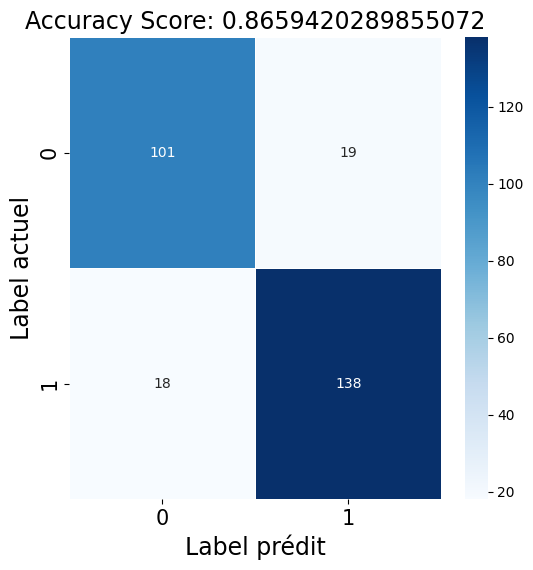

In [7]:
# 1.) Instanciation
gbc=GradientBoostingClassifier()
#Fitting
gbc.fit(X_train,Y_train)
#Prediction
gbc_pred=gbc.predict(X_test)
print('La valeur de Y predite est :',gbc_pred)
#Mesure devaluation
gbc_acc= accuracy_score(Y_test,gbc_pred)
#print('La valeur de l accuracy est :',gbc_acc)
#Matrice de confusion
mat= confusion_matrix(Y_test,gbc_pred)
plt.figure(figsize=(6,6))
sn.heatmap(mat,annot=True,
          fmt=".0f",
          linewidths=.5,
          cmap='Blues');
plt.ylabel('Label actuel',fontsize=17);
plt.xlabel('Label prédit',fontsize=17);
plt.title('Accuracy Score: {}'.format(gbc_acc), size=17);
plt.tick_params(labelsize=15)
print('La matrice de confusion est :',mat)
print(classification_report(Y_test,gbc_pred))


In [8]:
#Recherche de best paramétre du model
params=[
    {'n_estimators':np.random.randint(90,200,20)},
    {'learning_rate':np.linspace(0.1,1,35)},
    {'max_depth':np.random.randint(1,100,20)},
    {'max_leaf_nodes':np.random.randint(1,100,20)},
    {'random_state':np.random.randint(0,50,20)}
]
#initialisation du modele
model_gbc=GradientBoostingClassifier()
best_model=GridSearchCV(model_gbc,params,cv=5,verbose=10)#cv= cross validation et verbose permet l écriture 
best_model.fit(X_train,Y_train)

Fitting 5 folds for each of 115 candidates, totalling 575 fits
[CV 1/5; 1/115] START n_estimators=146..........................................
[CV 1/5; 1/115] END ...........n_estimators=146;, score=0.853 total time=   0.1s
[CV 2/5; 1/115] START n_estimators=146..........................................
[CV 2/5; 1/115] END ...........n_estimators=146;, score=0.922 total time=   0.1s
[CV 3/5; 1/115] START n_estimators=146..........................................
[CV 3/5; 1/115] END ...........n_estimators=146;, score=0.836 total time=   0.1s
[CV 4/5; 1/115] START n_estimators=146..........................................
[CV 4/5; 1/115] END ...........n_estimators=146;, score=0.859 total time=   0.1s
[CV 5/5; 1/115] START n_estimators=146..........................................
[CV 5/5; 1/115] END ...........n_estimators=146;, score=0.867 total time=   0.1s
[CV 1/5; 2/115] START n_estimators=123..........................................
[CV 1/5; 2/115] END ...........n_estimators=12

[CV 1/5; 11/115] END ..........n_estimators=196;, score=0.853 total time=   0.1s
[CV 2/5; 11/115] START n_estimators=196.........................................
[CV 2/5; 11/115] END ..........n_estimators=196;, score=0.922 total time=   0.1s
[CV 3/5; 11/115] START n_estimators=196.........................................
[CV 3/5; 11/115] END ..........n_estimators=196;, score=0.836 total time=   0.2s
[CV 4/5; 11/115] START n_estimators=196.........................................
[CV 4/5; 11/115] END ..........n_estimators=196;, score=0.875 total time=   0.2s
[CV 5/5; 11/115] START n_estimators=196.........................................
[CV 5/5; 11/115] END ..........n_estimators=196;, score=0.875 total time=   0.2s
[CV 1/5; 12/115] START n_estimators=121.........................................
[CV 1/5; 12/115] END ..........n_estimators=121;, score=0.853 total time=   0.1s
[CV 2/5; 12/115] START n_estimators=121.........................................
[CV 2/5; 12/115] END .......

[CV 2/5; 21/115] END .........learning_rate=0.1;, score=0.891 total time=   0.0s
[CV 3/5; 21/115] START learning_rate=0.1........................................
[CV 3/5; 21/115] END .........learning_rate=0.1;, score=0.836 total time=   0.0s
[CV 4/5; 21/115] START learning_rate=0.1........................................
[CV 4/5; 21/115] END .........learning_rate=0.1;, score=0.875 total time=   0.0s
[CV 5/5; 21/115] START learning_rate=0.1........................................
[CV 5/5; 21/115] END .........learning_rate=0.1;, score=0.883 total time=   0.0s
[CV 1/5; 22/115] START learning_rate=0.1264705882352941.........................
[CV 1/5; 22/115] END learning_rate=0.1264705882352941;, score=0.845 total time=   0.0s
[CV 2/5; 22/115] START learning_rate=0.1264705882352941.........................
[CV 2/5; 22/115] END learning_rate=0.1264705882352941;, score=0.899 total time=   0.0s
[CV 3/5; 22/115] START learning_rate=0.1264705882352941.........................
[CV 3/5; 22/115]

[CV 3/5; 31/115] END learning_rate=0.3647058823529412;, score=0.836 total time=   0.0s
[CV 4/5; 31/115] START learning_rate=0.3647058823529412.........................
[CV 4/5; 31/115] END learning_rate=0.3647058823529412;, score=0.859 total time=   0.0s
[CV 5/5; 31/115] START learning_rate=0.3647058823529412.........................
[CV 5/5; 31/115] END learning_rate=0.3647058823529412;, score=0.828 total time=   0.0s
[CV 1/5; 32/115] START learning_rate=0.39117647058823535........................
[CV 1/5; 32/115] END learning_rate=0.39117647058823535;, score=0.860 total time=   0.0s
[CV 2/5; 32/115] START learning_rate=0.39117647058823535........................
[CV 2/5; 32/115] END learning_rate=0.39117647058823535;, score=0.930 total time=   0.0s
[CV 3/5; 32/115] START learning_rate=0.39117647058823535........................
[CV 3/5; 32/115] END learning_rate=0.39117647058823535;, score=0.844 total time=   0.0s
[CV 4/5; 32/115] START learning_rate=0.39117647058823535..............

[CV 2/5; 41/115] END learning_rate=0.6294117647058823;, score=0.907 total time=   0.0s
[CV 3/5; 41/115] START learning_rate=0.6294117647058823.........................
[CV 3/5; 41/115] END learning_rate=0.6294117647058823;, score=0.812 total time=   0.0s
[CV 4/5; 41/115] START learning_rate=0.6294117647058823.........................
[CV 4/5; 41/115] END learning_rate=0.6294117647058823;, score=0.859 total time=   0.0s
[CV 5/5; 41/115] START learning_rate=0.6294117647058823.........................
[CV 5/5; 41/115] END learning_rate=0.6294117647058823;, score=0.844 total time=   0.0s
[CV 1/5; 42/115] START learning_rate=0.6558823529411765.........................
[CV 1/5; 42/115] END learning_rate=0.6558823529411765;, score=0.791 total time=   0.0s
[CV 2/5; 42/115] START learning_rate=0.6558823529411765.........................
[CV 2/5; 42/115] END learning_rate=0.6558823529411765;, score=0.891 total time=   0.0s
[CV 3/5; 42/115] START learning_rate=0.6558823529411765..................

[CV 2/5; 51/115] END learning_rate=0.8941176470588235;, score=0.915 total time=   0.0s
[CV 3/5; 51/115] START learning_rate=0.8941176470588235.........................
[CV 3/5; 51/115] END learning_rate=0.8941176470588235;, score=0.812 total time=   0.0s
[CV 4/5; 51/115] START learning_rate=0.8941176470588235.........................
[CV 4/5; 51/115] END learning_rate=0.8941176470588235;, score=0.836 total time=   0.0s
[CV 5/5; 51/115] START learning_rate=0.8941176470588235.........................
[CV 5/5; 51/115] END learning_rate=0.8941176470588235;, score=0.859 total time=   0.0s
[CV 1/5; 52/115] START learning_rate=0.9205882352941176.........................
[CV 1/5; 52/115] END learning_rate=0.9205882352941176;, score=0.822 total time=   0.0s
[CV 2/5; 52/115] START learning_rate=0.9205882352941176.........................
[CV 2/5; 52/115] END learning_rate=0.9205882352941176;, score=0.915 total time=   0.0s
[CV 3/5; 52/115] START learning_rate=0.9205882352941176..................

[CV 2/5; 61/115] END ..............max_depth=65;, score=0.845 total time=   0.3s
[CV 3/5; 61/115] START max_depth=65.............................................
[CV 3/5; 61/115] END ..............max_depth=65;, score=0.789 total time=   0.4s
[CV 4/5; 61/115] START max_depth=65.............................................
[CV 4/5; 61/115] END ..............max_depth=65;, score=0.852 total time=   0.3s
[CV 5/5; 61/115] START max_depth=65.............................................
[CV 5/5; 61/115] END ..............max_depth=65;, score=0.805 total time=   0.4s
[CV 1/5; 62/115] START max_depth=20.............................................
[CV 1/5; 62/115] END ..............max_depth=20;, score=0.775 total time=   0.4s
[CV 2/5; 62/115] START max_depth=20.............................................
[CV 2/5; 62/115] END ..............max_depth=20;, score=0.829 total time=   0.3s
[CV 3/5; 62/115] START max_depth=20.............................................
[CV 3/5; 62/115] END .......

[CV 3/5; 71/115] END ...............max_depth=8;, score=0.773 total time=   0.5s
[CV 4/5; 71/115] START max_depth=8..............................................
[CV 4/5; 71/115] END ...............max_depth=8;, score=0.852 total time=   0.6s
[CV 5/5; 71/115] START max_depth=8..............................................
[CV 5/5; 71/115] END ...............max_depth=8;, score=0.875 total time=   0.6s
[CV 1/5; 72/115] START max_depth=23.............................................
[CV 1/5; 72/115] END ..............max_depth=23;, score=0.775 total time=   0.6s
[CV 2/5; 72/115] START max_depth=23.............................................
[CV 2/5; 72/115] END ..............max_depth=23;, score=0.822 total time=   0.7s
[CV 3/5; 72/115] START max_depth=23.............................................
[CV 3/5; 72/115] END ..............max_depth=23;, score=0.789 total time=   0.5s
[CV 4/5; 72/115] START max_depth=23.............................................
[CV 4/5; 72/115] END .......

[CV 4/5; 81/115] END .........max_leaf_nodes=94;, score=0.875 total time=   0.1s
[CV 5/5; 81/115] START max_leaf_nodes=94........................................
[CV 5/5; 81/115] END .........max_leaf_nodes=94;, score=0.883 total time=   0.1s
[CV 1/5; 82/115] START max_leaf_nodes=86........................................
[CV 1/5; 82/115] END .........max_leaf_nodes=86;, score=0.853 total time=   0.1s
[CV 2/5; 82/115] START max_leaf_nodes=86........................................
[CV 2/5; 82/115] END .........max_leaf_nodes=86;, score=0.891 total time=   0.1s
[CV 3/5; 82/115] START max_leaf_nodes=86........................................
[CV 3/5; 82/115] END .........max_leaf_nodes=86;, score=0.836 total time=   0.1s
[CV 4/5; 82/115] START max_leaf_nodes=86........................................
[CV 4/5; 82/115] END .........max_leaf_nodes=86;, score=0.875 total time=   0.1s
[CV 5/5; 82/115] START max_leaf_nodes=86........................................
[CV 5/5; 82/115] END .......

[CV 1/5; 92/115] END .........max_leaf_nodes=21;, score=0.853 total time=   0.0s
[CV 2/5; 92/115] START max_leaf_nodes=21........................................
[CV 2/5; 92/115] END .........max_leaf_nodes=21;, score=0.891 total time=   0.0s
[CV 3/5; 92/115] START max_leaf_nodes=21........................................
[CV 3/5; 92/115] END .........max_leaf_nodes=21;, score=0.836 total time=   0.0s
[CV 4/5; 92/115] START max_leaf_nodes=21........................................
[CV 4/5; 92/115] END .........max_leaf_nodes=21;, score=0.875 total time=   0.0s
[CV 5/5; 92/115] START max_leaf_nodes=21........................................
[CV 5/5; 92/115] END .........max_leaf_nodes=21;, score=0.883 total time=   0.0s
[CV 1/5; 93/115] START max_leaf_nodes=89........................................
[CV 1/5; 93/115] END .........max_leaf_nodes=89;, score=0.853 total time=   0.0s
[CV 2/5; 93/115] START max_leaf_nodes=89........................................
[CV 2/5; 93/115] END .......

[CV 3/5; 102/115] END ..........random_state=44;, score=0.836 total time=   0.1s
[CV 4/5; 102/115] START random_state=44.........................................
[CV 4/5; 102/115] END ..........random_state=44;, score=0.875 total time=   0.1s
[CV 5/5; 102/115] START random_state=44.........................................
[CV 5/5; 102/115] END ..........random_state=44;, score=0.883 total time=   0.0s
[CV 1/5; 103/115] START random_state=28.........................................
[CV 1/5; 103/115] END ..........random_state=28;, score=0.853 total time=   0.0s
[CV 2/5; 103/115] START random_state=28.........................................
[CV 2/5; 103/115] END ..........random_state=28;, score=0.891 total time=   0.0s
[CV 3/5; 103/115] START random_state=28.........................................
[CV 3/5; 103/115] END ..........random_state=28;, score=0.836 total time=   0.0s
[CV 4/5; 103/115] START random_state=28.........................................
[CV 4/5; 103/115] END ......

[CV 5/5; 112/115] END ..........random_state=15;, score=0.883 total time=   0.0s
[CV 1/5; 113/115] START random_state=31.........................................
[CV 1/5; 113/115] END ..........random_state=31;, score=0.853 total time=   0.0s
[CV 2/5; 113/115] START random_state=31.........................................
[CV 2/5; 113/115] END ..........random_state=31;, score=0.891 total time=   0.0s
[CV 3/5; 113/115] START random_state=31.........................................
[CV 3/5; 113/115] END ..........random_state=31;, score=0.836 total time=   0.0s
[CV 4/5; 113/115] START random_state=31.........................................
[CV 4/5; 113/115] END ..........random_state=31;, score=0.875 total time=   0.1s
[CV 5/5; 113/115] START random_state=31.........................................
[CV 5/5; 113/115] END ..........random_state=31;, score=0.883 total time=   0.1s
[CV 1/5; 114/115] START random_state=0..........................................
[CV 1/5; 114/115] END ......

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid=[{'n_estimators': array([146, 123, 153,  98, 147, 185, 138, 121, 161, 116, 196, 121, 158,
       147, 137, 109, 181, 179, 145,  94])},
                         {'learning_rate': array([0.1       , 0.12647059, 0.15294118, 0.17941176, 0.20588235,
       0.23235294, 0.25882353, 0.28529412, 0.31176471, 0.33823529,
       0.36470588, 0.39117647, 0.41764706, 0.44411765, 0.4705...
       0.76176471, 0.78823529, 0.81470588, 0.84117647, 0.86764706,
       0.89411765, 0.92058824, 0.94705882, 0.97352941, 1.        ])},
                         {'max_depth': array([52, 97, 57, 20, 35, 65, 20, 35, 71, 67, 11, 63, 63, 54, 73,  8, 23,
       19, 70, 40])},
                         {'max_leaf_nodes': array([71, 85, 16, 25, 66, 94, 86,  7, 27, 78, 34, 91,  4,  8, 34, 40, 21,
       89, 78, 76])},
                         {'random_state': array([38, 28,  5, 47, 43,  7, 44, 28, 19,  7,  3, 49, 49, 10, 44, 34, 15,
       31,  0, 30])}],
             verbose=10)

In [9]:
#meilleur paramétre optimaux
print(best_model.best_params_)
#model optimal
print(best_model.best_estimator_)
#meilleur score
print(best_model.best_score_)

{'learning_rate': 0.39117647058823535}
GradientBoostingClassifier(learning_rate=0.39117647058823535)
0.8768895348837209


La valeur de Y predite est : [1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0
 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1
 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0
 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1]
La matrice de confusion est : [[102  18]
 [ 22 134]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       120
           1       0.88      0.86      0.87       156

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276



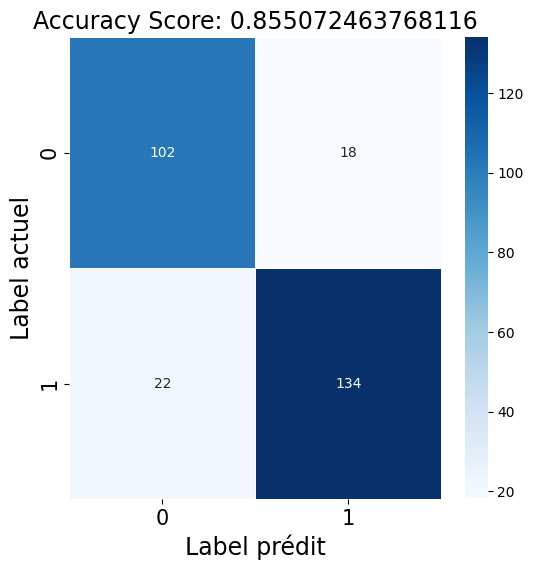

In [10]:
#Recherche avec les resultats des Best Paramétres
# 1.) Instanciation
gbc=GradientBoostingClassifier(learning_rate=0.39117647058823535)
#Fitting
gbc.fit(X_train,Y_train)
#Prediction
gbc_pred=gbc.predict(X_test)
print('La valeur de Y predite est :',gbc_pred)
#Mesure devaluation
gbc_acc= accuracy_score(Y_test,gbc_pred)
#print('La valeur de l accuracy est :',gbc_acc)
#Matrice de confusion
mat= confusion_matrix(Y_test,gbc_pred)
plt.figure(figsize=(6,6))
sn.heatmap(mat,annot=True,
          fmt=".0f",
          linewidths=.5,
          cmap='Blues');
plt.ylabel('Label actuel',fontsize=17);
plt.xlabel('Label prédit',fontsize=17);
plt.title('Accuracy Score: {}'.format(gbc_acc), size=17);
plt.tick_params(labelsize=15)
print('La matrice de confusion est :',mat)
print(classification_report(Y_test,gbc_pred))


Conclusion: Aprés évaluation du modele avec les best paramétres, on constate que le modele détecte plus 
les personnes atteintes de maladie cardiaque que les personnes non atteintes.

### 2.1 Implementation du Gradient Tree Boosting Regression

Pour appliquer la regression nous devons utilisé des varibles quantitatives.
Nous avons faire une prediction sur le prix de loyer.

In [5]:
df1=pd.read_csv("House_Rent_Dataset.csv",sep=",")
df1.head(50)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [6]:
house_features=['Posted On','BHK','Size','Floor','Area Type','Area Locality','City','Furnishing Status','Tenant Preferred','Bathroom','Point of Contact']
X1=pd.get_dummies(df1[house_features])
Y1=df1['Rent']
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Columns: 2817 entries, BHK to Point of Contact_Contact Owner
dtypes: int64(3), uint8(2814)
memory usage: 12.8 MB


In [5]:
X_cr1=StandardScaler().fit_transform(X1)
print(X_cr1)
# Verifier 
print("Moyen : ",X_cr1.mean(axis=0),"\n")
print("Ecart Type : ",X_cr1.std(axis=0))

[[-0.10077301  0.2089605   0.03859399 ... -0.68941101 -0.01451717
   0.68974363]
 [-0.10077301 -0.26412451 -1.09206691 ... -0.68941101 -0.01451717
   0.68974363]
 [-0.10077301  0.0512655  -1.09206691 ... -0.68941101 -0.01451717
   0.68974363]
 ...
 [ 1.10090711  1.233978    1.16925489 ...  1.45051354 -0.01451717
  -1.44981405]
 [ 1.10090711  0.8397405   0.03859399 ...  1.45051354 -0.01451717
  -1.44981405]
 [-0.10077301  0.0512655   0.03859399 ... -0.68941101 -0.01451717
   0.68974363]]
Moyen :  [ 2.99428039e-17  8.98284116e-17 -1.19771215e-16 ... -1.43725459e-16
  1.49714019e-18 -7.18627293e-17] 

Ecart Type :  [1. 1. 1. ... 1. 1. 1.]


In [6]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X_cr1,Y1, test_size=0.3,random_state=15)
print("Taille de X",X1.shape)
print("Taille de Y",Y1.shape)
print("Taille de X traine",X_train1.shape)
print("Taille de X teste",X_test1.shape)

Taille de X (4746, 2817)
Taille de Y (4746,)
Taille de X traine (3322, 2817)
Taille de X teste (1424, 2817)


In [7]:
# 1.) Instanciation
gbr=GradientBoostingRegressor()
#Fitting
gbr.fit(X_train1,Y_train1)
#Prediction
gbr_pred=gbr.predict(X_test1)
print('La valeur de Y predite est :',gbr_pred)
#Mesure devaluation
gbr_acc= r2_score(Y_test1,gbr_pred)
print('la score est :',gbr_acc)
gbr_err= mean_squared_error(Y_test1,gbr_pred)
print('la perte des moindres carrés et les apprenants de base est :',gbr_err)
gbr_err2= mean_absolute_error(Y_test1,gbr_pred)
print('la valeur absolu de la perte des moindres carrés et les apprenants de base est :',gbr_err2)

La valeur de Y predite est : [12751.96873254 14756.11420663  9310.77101553 ... 13585.6075412
 40394.75287532 24740.26622311]
la score est : 0.6768072950924328
la perte des moindres carrés et les apprenants de base est : 1303197613.3053174
la valeur absolu de la perte des moindres carrés et les apprenants de base est : 11007.294746208929


In [22]:
#Recherche de best paramétre du model
params=[
    {'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile']},
    {'n_estimators':np.random.randint(90,200,4)},
    {'learning_rate':np.linspace(0.1,1,5)},
    {'max_depth':np.random.randint(1,8,6)},
    {'max_leaf_nodes':np.random.randint(2,10,5)},
    {'warm_start':[True,False]},
    {'random_state':np.random.randint(0,15,5)}
]
#initialisation du modele
model_gbr=GradientBoostingRegressor()
best_modelR=GridSearchCV(model_gbr,params,cv=5,verbose=10)#cv= cross validation et verbose permet l écriture 
best_modelR.fit(X_train1,Y_train1)

Fitting 5 folds for each of 31 candidates, totalling 155 fits
[CV 1/5; 1/31] START loss=squared_error.........................................
[CV 1/5; 1/31] END ..........loss=squared_error;, score=0.093 total time=  46.3s
[CV 2/5; 1/31] START loss=squared_error.........................................
[CV 2/5; 1/31] END ..........loss=squared_error;, score=0.712 total time=  51.6s
[CV 3/5; 1/31] START loss=squared_error.........................................
[CV 3/5; 1/31] END ..........loss=squared_error;, score=0.758 total time=  48.8s
[CV 4/5; 1/31] START loss=squared_error.........................................
[CV 4/5; 1/31] END ..........loss=squared_error;, score=0.717 total time=  46.5s
[CV 5/5; 1/31] START loss=squared_error.........................................
[CV 5/5; 1/31] END ..........loss=squared_error;, score=0.726 total time=  46.1s
[CV 1/5; 2/31] START loss=absolute_error........................................
[CV 1/5; 2/31] END .........loss=absolute_error

[CV 1/5; 11/31] END .........learning_rate=0.55;, score=0.079 total time=  30.2s
[CV 2/5; 11/31] START learning_rate=0.55........................................
[CV 2/5; 11/31] END .........learning_rate=0.55;, score=0.677 total time=  30.6s
[CV 3/5; 11/31] START learning_rate=0.55........................................
[CV 3/5; 11/31] END .........learning_rate=0.55;, score=0.763 total time=  30.6s
[CV 4/5; 11/31] START learning_rate=0.55........................................
[CV 4/5; 11/31] END .........learning_rate=0.55;, score=0.712 total time=  27.5s
[CV 5/5; 11/31] START learning_rate=0.55........................................
[CV 5/5; 11/31] END .........learning_rate=0.55;, score=0.742 total time=  31.1s
[CV 1/5; 12/31] START learning_rate=0.775.......................................
[CV 1/5; 12/31] END ........learning_rate=0.775;, score=0.053 total time=  30.8s
[CV 2/5; 12/31] START learning_rate=0.775.......................................
[CV 2/5; 12/31] END ........

[CV 2/5; 21/31] END ...........max_leaf_nodes=8;, score=0.715 total time=  37.1s
[CV 3/5; 21/31] START max_leaf_nodes=8..........................................
[CV 3/5; 21/31] END ...........max_leaf_nodes=8;, score=0.764 total time=  37.3s
[CV 4/5; 21/31] START max_leaf_nodes=8..........................................
[CV 4/5; 21/31] END ...........max_leaf_nodes=8;, score=0.717 total time=  37.2s
[CV 5/5; 21/31] START max_leaf_nodes=8..........................................
[CV 5/5; 21/31] END ...........max_leaf_nodes=8;, score=0.717 total time=  37.3s
[CV 1/5; 22/31] START max_leaf_nodes=2..........................................
[CV 1/5; 22/31] END ...........max_leaf_nodes=2;, score=0.091 total time=  25.0s
[CV 2/5; 22/31] START max_leaf_nodes=2..........................................
[CV 2/5; 22/31] END ...........max_leaf_nodes=2;, score=0.391 total time=  24.4s
[CV 3/5; 22/31] START max_leaf_nodes=2..........................................
[CV 3/5; 22/31] END ........

[CV 3/5; 31/31] END ............random_state=12;, score=0.766 total time=  30.0s
[CV 4/5; 31/31] START random_state=12...........................................
[CV 4/5; 31/31] END ............random_state=12;, score=0.726 total time=  29.8s
[CV 5/5; 31/31] START random_state=12...........................................
[CV 5/5; 31/31] END ............random_state=12;, score=0.749 total time=  30.0s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid=[{'loss': ['squared_error', 'absolute_error', 'huber',
                                   'quantile']},
                         {'n_estimators': array([168, 152, 126, 167])},
                         {'learning_rate': array([0.1  , 0.325, 0.55 , 0.775, 1.   ])},
                         {'max_depth': array([1, 6, 2, 2, 5, 1])},
                         {'max_leaf_nodes': array([7, 8, 2, 5, 5])},
                         {'warm_start': [True, False]},
                         {'random_state': array([14, 10,  9,  2, 12])}],
             verbose=10)

In [23]:
#meilleur paramétre optimaux
print(best_modelR.best_params_)
#model optimal
print(best_modelR.best_estimator_)
#meilleur score
print(best_modelR.best_score_)

{'max_depth': 6}
GradientBoostingRegressor(max_depth=6)
0.6321304721086787


In [24]:
#Nous avons comparés les premiéres valeurs prédites du méthode et de Gridsearch
print(gbr_pred[0:1])
print(Y_test1.iloc[0:1])

[12830.46074669]
4674    14000
Name: Rent, dtype: int64


In [25]:
#Utilisation du best paramétre
gbr=GradientBoostingRegressor(max_depth=6)
#Fitting
gbr.fit(X_train1,Y_train1)
#Prediction
gbr_pred=gbr.predict(X_test1)
print('La valeur de Y predite est :',gbr_pred)
#Mesure devaluation
gbr_acc= r2_score(Y_test1,gbr_pred)
print('la score est :',gbr_acc)
gbr_err= mean_squared_error(Y_test1,gbr_pred)
print('la perte des moindres carrés et les apprenants de base est :',gbr_err)
gbr_err2= mean_absolute_error(Y_test1,gbr_pred)
print('la valeur absolu de la perte des moindres carrés et les apprenants de base est :',gbr_err2)

La valeur de Y predite est : [13548.46585721 14808.54643004  9209.36178501 ... 12396.20161226
 46866.44089669 21628.3752277 ]
la score est : 0.722130768612707
la perte des moindres carrés et les apprenants de base est : 1120441500.2450902
la valeur absolu de la perte des moindres carrés et les apprenants de base est : 10445.76422332629


In [26]:
#Nous avons comparés les premiéres valeurs prédites du méthode et du best Paramétre
print(gbr_pred[0:1])
print(Y_test1.iloc[0:1])

[13548.46585721]
4674    14000
Name: Rent, dtype: int64


In [27]:
#Application du méthode avec des paramétres initiales
gbr=GradientBoostingRegressor(loss = 'absolute_error',learning_rate=0.2)
#Fitting
gbr.fit(X_train1,Y_train1)
#Prediction
gbr_pred=gbr.predict(X_test1)
print('La valeur de Y predite est :',gbr_pred)
#Mesure devaluation
gbr_acc= r2_score(Y_test1,gbr_pred)
print('la score est :',gbr_acc)
gbr_err= mean_squared_error(Y_test1,gbr_pred)
print('la perte des moindres carrés et les apprenants de base est :',gbr_err)
gbr_err2= mean_absolute_error(Y_test1,gbr_pred)
print('la valeur absolu de la perte des moindres carrés et les apprenants de base est :',gbr_err2)

La valeur de Y predite est : [12822.22311059 13875.23419583  7436.13350012 ... 10399.54542089
 42957.23285202 21711.26627199]
la score est : 0.5950259962450448
la perte des moindres carrés et les apprenants de base est : 1632961224.465433
la valeur absolu de la perte des moindres carrés et les apprenants de base est : 10793.553682165004


In [28]:
#Nous avons comparés les premiéres valeurs prédites du méthode et des valeur par défaut
print(gbr_pred[0:1])
print(Y_test1.iloc[0:1])

[12822.22311059]
4674    14000
Name: Rent, dtype: int64


Conclusion: Aprés évaluation du modele nous avons constatés que la méthode du GradientBoostingRegressor réduit à chaque fois les erreurs et que les valeurs prédites sont de plus en plus proche des valeurs de bases.